# Preprocessing data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df_train = pd.read_csv("data/training_set_VU_DM.csv")


## Transform datetime

In [3]:
df_train["date_time"] = pd.to_datetime(df_train["date_time"])
df_train["year"] = df_train["date_time"].dt.year
df_train["month"] = df_train["date_time"].dt.month
df_train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,1,157.84,1,2013,6


## Remove outliers / exlcuding nan-columns

In [4]:
cols_missing = df_train.columns[df_train.isnull().any()].tolist()

for col in df_train.columns:
    if col not in cols_missing:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_values = Q3 + 1.5 * IQR
        lower_values = Q1 - 1.5 * IQR
        # tried to follow this example, but it didn't work out: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
        # df_train = df_train[~((df_train[col] < (Q1 - 1.5 * IQR)) |(df_train[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
        to_be_removed = list(df_train.loc[((df_train[col] < lower_values) | (df_train[col] > upper_values))].index)
        
#for index in indices_to_remove:
rows_to_be_removed = list(set(to_be_removed))
df_train = df_train.drop(index=rows_to_be_removed, errors="ignore", axis=0)
# display(df_train)

        

## Outlier detection / nan-columns

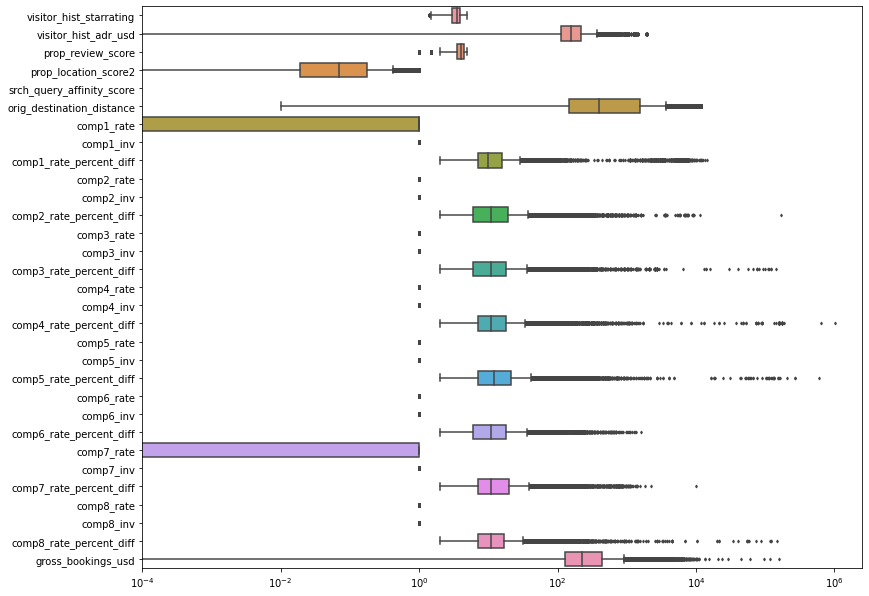

In [5]:
def outliers():
    # cols = [
    #         'prop_location_score2',
    #         'prop_location_score1',
    #         'srch_booking_window',
    #         'price_usd',
    #         'prop_historical_price',
    #         'orig_destination_distance',
    #         ]
    cols = df_train.columns[df_train.isnull().any()].tolist()
    fig, axarr = plt.subplots(figsize=(2000/120, 1200/120))
   # ax = df[cols].boxplot(rot=90, return_type="axes", sym='k.', showfliers=True)
    """
    train[cols].boxplot(vert=False, sym='k.')
    plt.xscale('log')
    """
    #vals = [x.dropna() for y,x in df[cols].iteritems()]
    ax = sns.boxplot(data=df_train[cols], orient='h', fliersize=2)
    ax.set_xscale('log')
    plt.xlim(xmin=1e-4)
    plt.subplots_adjust(left=0.3, bottom=0.1)
    # plt.savefig("outliers", dpi=400)

outliers()

## Fill missing values

In [6]:
df_train.isnull().sum()


srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        3781049
visitor_hist_adr_usd           3780325
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7353
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2            886972
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      3716919
orig_destination_distance

### Over het opvullen van de missing values ben ik nog niet over uit, wat denken jullie?

In [ ]:
# ["prop_review_score", "prop_location_score2", "orig_destination_distance"]
df_train = df_train.fillna(value=-1)

## Balance dataset between clicked and not-clicked items

In [9]:
#balancing dataset
click_indices = df_train[df_train.click_bool == 1].index
random_indices = np.random.choice(click_indices, len(df_train.loc[df_train.click_bool == 1]), replace=False)
click_sample = df_train.loc[random_indices]

not_click = df_train[df_train.click_bool == 0].index
random_indices = np.random.choice(not_click, sum(df_train['click_bool']), replace=False)
not_click_sample = df_train.loc[random_indices]

df_train = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(df_train[df_train.click_bool == 0])/len(df_train))
print("Percentage of click impression: ", len(df_train[df_train.click_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  356904


## Balance dataset between booked and not-booked items

In [10]:
#balancing dataset
book_indices = df_train[df_train.booking_bool == 1].index
random_indices = np.random.choice(book_indices, len(df_train.loc[df_train.booking_bool == 1]), replace=False)
book_sample = df_train.loc[random_indices]

not_booked = df_train[df_train.booking_bool == 0].index
random_indices = np.random.choice(not_booked, sum(df_train['booking_bool']), replace=False)
not_booked_sample = df_train.loc[random_indices]

df_train = pd.concat([not_booked_sample, book_sample], axis=0)

print("Percentage of not click impressions: ", len(df_train[df_train.booking_bool == 0])/len(df_train))
print("Percentage of click impression: ", len(df_train[df_train.booking_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  222096
